In [15]:
#importing  neccesary library and  data 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Polygon
import matplotlib.dates as mdates
%matplotlib inline
import datetime as dt
df=pd.read_csv("netflix_titles.csv")



In [16]:
print(list(df.columns))

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [17]:
print("Number of rows: ", len(df))

Number of rows:  8807


In [18]:
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [20]:
# dropped ALL duplicate values
df.drop_duplicates(subset ="show_id",
                     keep = False, inplace = True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [22]:
#changing datatype of date_added column to datetime
df["date_added"] = pd.to_datetime(df["date_added"])
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 894.5+ KB


In [23]:
# added year_added column
df['year_added'] = df['date_added'].dt.year
df


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0


In [24]:
# added month_added column
df['month_added'] = df['date_added'].dt.month_name()
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,September
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,September
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,September
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,November
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0,July
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,November
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,January


In [25]:
# added month_added column
df['day_added'] = df['date_added'].dt.day_name()
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,September,Saturday
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,September,Friday
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,September,Friday
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,September,Friday
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,September,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,November,Wednesday
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0,July,Monday
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,November,Friday
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,January,Saturday


In [26]:
#types of show on netflix
types =df.groupby(['type',])[ 'type'].count().reset_index(name='count')
types=types.set_index('type')
types

,count
type,
Movie,6131
TV Show,2676


In [28]:
#grouped by directors of show and type
show_director= df.groupby(['director','type'])[ 'director'].count().reset_index(name='show_count')
show_director

,director,type,show_count
0,A. L. Vijay,Movie,2
1,A. Raajdheep,Movie,1
2,A. Salaam,Movie,1
3,A.R. Murugadoss,Movie,2
4,Aadish Keluskar,Movie,1
...,...,...,...
4571,Çagan Irmak,Movie,1
4572,Ísold Uggadóttir,Movie,1
4573,Óskar Thór Axelsson,Movie,1
4574,Ömer Faruk Sorak,Movie,2


In [30]:
#top 10 directors
top10_directors=show_director.query("`show_count` >= 12")
top10_directors

,director,type,show_count
690,Cathy Garcia-Molina,Movie,13
1800,Jay Chapman,Movie,12
1803,Jay Karas,Movie,14
2622,Marcus Raboy,Movie,15
2697,Martin Scorsese,Movie,12
3428,Rajiv Chilaka,Movie,19
3479,"Raúl Campos, Jan Suter",Movie,18
4087,Suhas Kadav,Movie,16
4527,Youssef Chahine,Movie,12


In [31]:
#grouped by contry and type
show_origin= df.groupby(['country','type'])[ 'type'].count().reset_index(name='show_count')
show_origin

,country,type,show_count
0,", France, Algeria",Movie,1
1,", South Korea",TV Show,1
2,Argentina,Movie,38
3,Argentina,TV Show,18
4,"Argentina, Brazil, France, Poland, Germany, De...",Movie,1
...,...,...,...
842,Venezuela,Movie,1
843,"Venezuela, Colombia",Movie,1
844,Vietnam,Movie,7
845,West Germany,Movie,1


In [32]:
#write query to find top20 country
top20_country=show_origin.query("`show_count` >= 81")
top20_country

,country,type,show_count
67,Canada,Movie,122
171,Egypt,Movie,92
284,India,Movie,893
362,Japan,TV Show,169
420,Nigeria,Movie,86
499,South Korea,TV Show,158
509,Spain,Movie,97
580,United Kingdom,Movie,206
581,United Kingdom,TV Show,213
685,United States,Movie,2058


In [33]:
#grouped by listed_In and type
show_genre= df.groupby(['listed_in','type'])[ 'type'].count().reset_index(name='show_genre_count')
show_genre

,listed_in,type,show_genre_count
0,Action & Adventure,Movie,128
1,"Action & Adventure, Anime Features",Movie,1
2,"Action & Adventure, Anime Features, Children &...",Movie,4
3,"Action & Adventure, Anime Features, Classic Mo...",Movie,2
4,"Action & Adventure, Anime Features, Horror Movies",Movie,1
...,...,...,...
509,"TV Horror, TV Mysteries, Teen TV Shows",TV Show,1
510,"TV Horror, Teen TV Shows",TV Show,2
511,"TV Sci-Fi & Fantasy, TV Thrillers",TV Show,1
512,TV Shows,TV Show,16


In [34]:
#write query to find top20 genre
top20_genre=show_genre.query("`show_genre_count` >= 110")
top20_genre

,listed_in,type,show_genre_count
0,Action & Adventure,Movie,128
39,"Action & Adventure, Dramas, International Movies",Movie,132
121,Children & Family Movies,Movie,215
125,"Children & Family Movies, Comedies",Movie,201
185,Comedies,Movie,110
199,"Comedies, Dramas, Independent Movies",Movie,116
200,"Comedies, Dramas, International Movies",Movie,274
217,"Comedies, International Movies",Movie,176
220,"Comedies, International Movies, Romantic Movies",Movie,152
244,"Crime TV Shows, International TV Shows, TV Dramas",TV Show,110


In [35]:
#grouped by rating and type
show_rating= df.groupby(['rating','type'])[ 'rating'].count().reset_index(name='ratings_count')
show_rating=show_rating.set_index('rating')
show_rating

,type,ratings_count
rating,,
66 min,Movie,1
74 min,Movie,1
84 min,Movie,1
G,Movie,41
NC-17,Movie,3
NR,Movie,75
NR,TV Show,5
PG,Movie,287
PG-13,Movie,490


In [42]:
dsc= df.groupby(['duration','type'])[ 'type'].count().reset_index(name='dsc')
dsc
#SORT
dsc.sort_values(by=['type'], ascending=False)

,duration,type,dsc
0,1 Season,TV Show,1793
25,12 Seasons,TV Show,2
208,9 Seasons,TV Show,9
196,8 Seasons,TV Show,17
185,7 Seasons,TV Show,23
...,...,...,...
86,171 min,Movie,7
87,172 min,Movie,4
88,173 min,Movie,6
89,174 min,Movie,2


In [56]:
#grouped by month_added and type
release_month= df.groupby(['month_added','type'])[ 'type'].count().reset_index(name='release_month')
release_month

,month_added,type,release_month
0,April,Movie,550
1,April,TV Show,214
2,August,Movie,519
3,August,TV Show,236
4,December,Movie,547
5,December,TV Show,266
6,February,Movie,382
7,February,TV Show,181
8,January,Movie,546
9,January,TV Show,192


In [44]:
#grouped by year_added and type
release_year= df.groupby(['year_added','type'])[ 'type'].count().reset_index(name='release_count')
release_year

,year_added,type,release_count
0,2008.0,Movie,1
1,2008.0,TV Show,1
2,2009.0,Movie,2
3,2010.0,Movie,1
4,2011.0,Movie,13
5,2012.0,Movie,3
6,2013.0,Movie,6
7,2013.0,TV Show,5
8,2014.0,Movie,19
9,2014.0,TV Show,5


In [45]:
#grouped by day_added and type
release_Day= df.groupby(['day_added','type'])[ 'type'].count().reset_index(name='release_Day')
release_Day

,day_added,type,release_Day
0,Friday,Movie,1566
1,Friday,TV Show,932
2,Monday,Movie,628
3,Monday,TV Show,223
4,Saturday,Movie,557
5,Saturday,TV Show,259
6,Sunday,Movie,569
7,Sunday,TV Show,182
8,Thursday,Movie,1053
9,Thursday,TV Show,343


Text(0.5, 1.0, 'types_of_show')

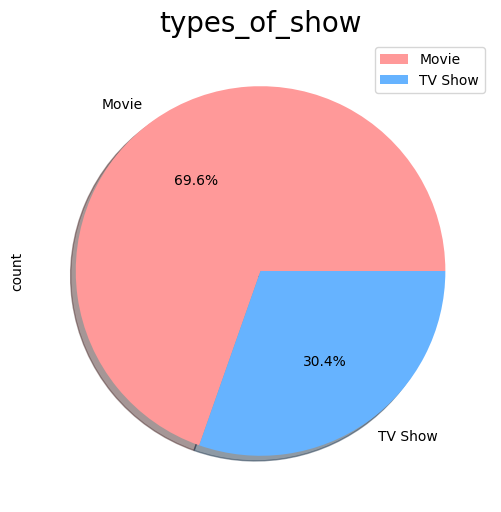

In [46]:
# percentage of types of show
colors = ['#ff9999','#66b3ff']
types.plot.pie(y='count',autopct='%.1f%%', shadow=True, legend= 'type' , figsize=(6,6),colors=colors)
plt.title('types_of_show', fontsize=20)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Canada'),
  Text(1, 0, 'Egypt'),
  Text(2, 0, 'India'),
  Text(3, 0, 'Japan'),
  Text(4, 0, 'Nigeria'),
  Text(5, 0, 'South Korea'),
  Text(6, 0, 'Spain'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'United States')])

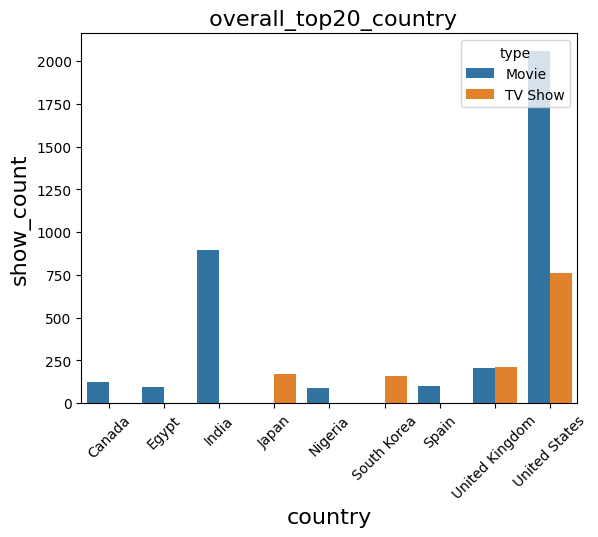

In [47]:
sns.barplot(x =top20_country.reset_index()['country'], y=top20_country.reset_index()['show_count'],
            hue =  top20_country.reset_index()['type']);
plt.title(' overall_top20_country', fontsize=16)
plt.xlabel('country', fontsize=16);
plt.ylabel('show_count', fontsize=16);
sns.set(rc = {'figure.figsize':(20,10)})
plt.xticks(rotation = 45)


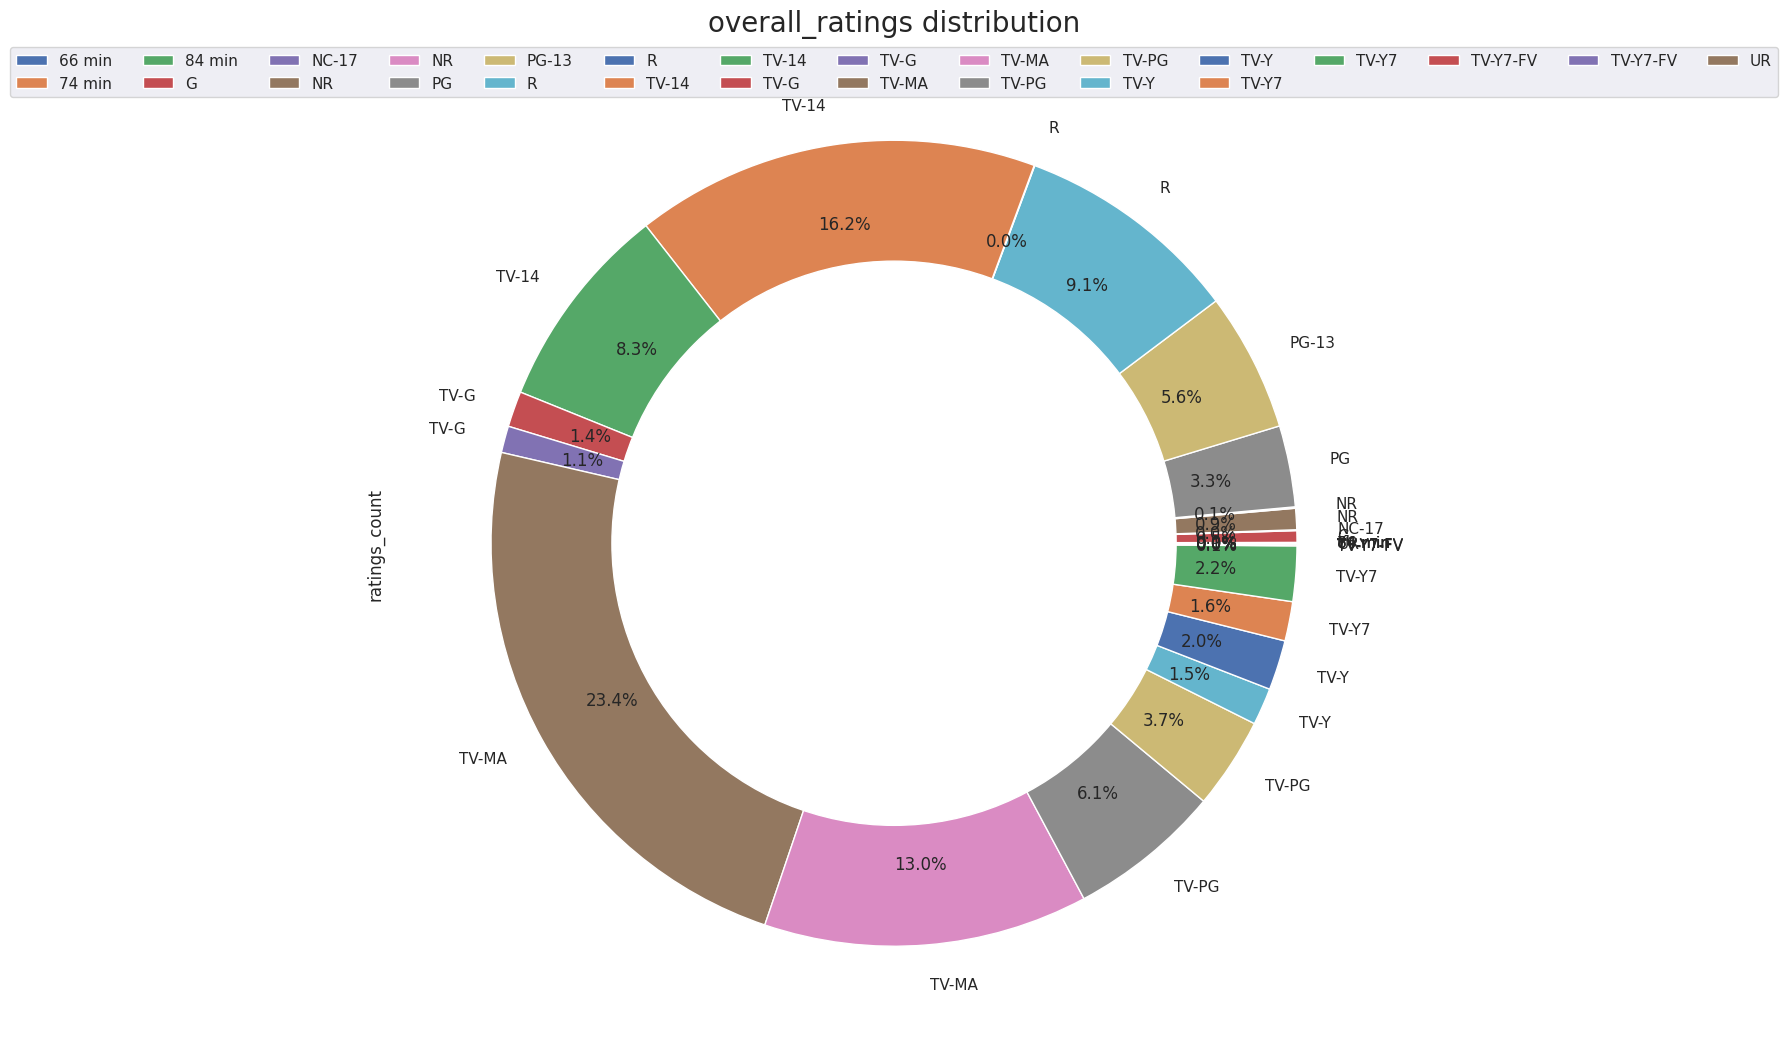

In [50]:
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,0.05, 0.05, 0.05, 0.05, 0.05,0.05, 0.05,0.05)
show_rating.plot.pie(y='ratings_count',autopct='%.1f%%', figsize=(13,17), pctdistance= 0.80,  x='explode')
plt.title('overall_ratings distribution', fontsize=20)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(ncol=15, loc="upper center")


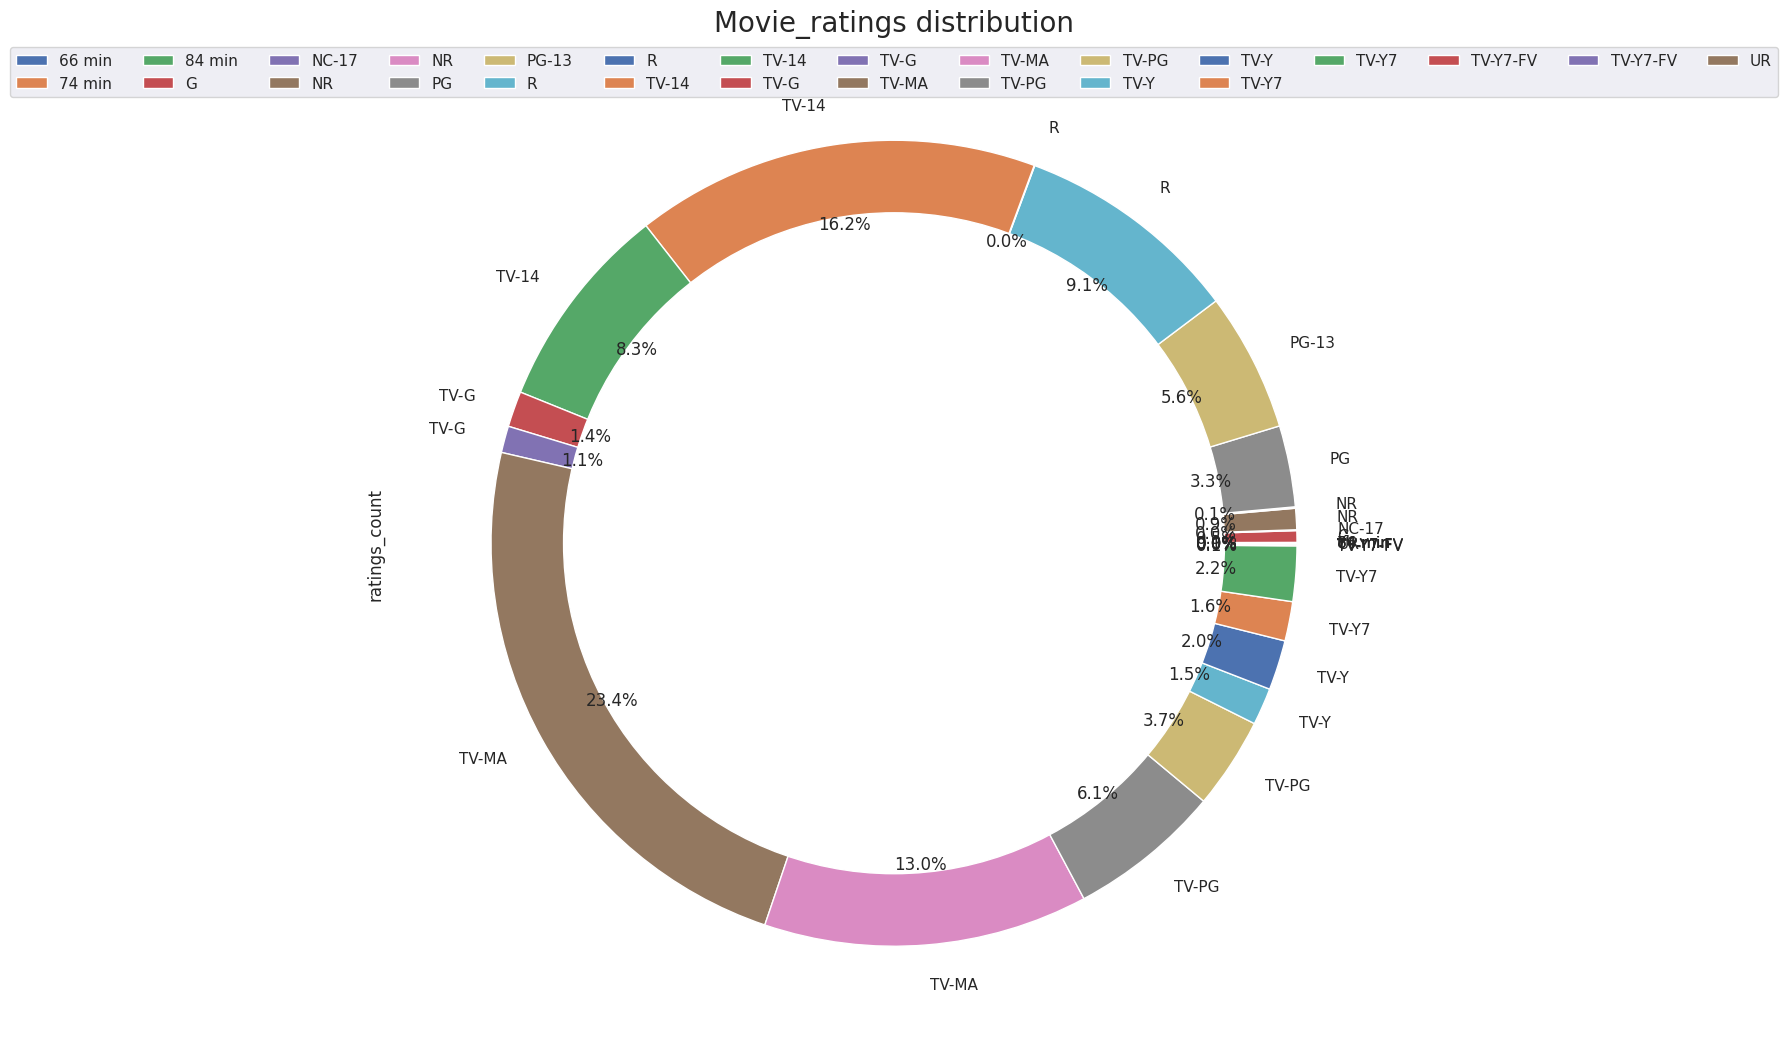

In [53]:
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05 )
rating_movie.plot.pie(y='ratings_count',autopct='%.1f%%', figsize=(13,17), pctdistance= 0.80,  x='explode')
plt.title('Movie_ratings distribution', fontsize=20)
centre_circle = plt.Circle((0, 0), 0.82, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(ncol=15, loc="upper center")


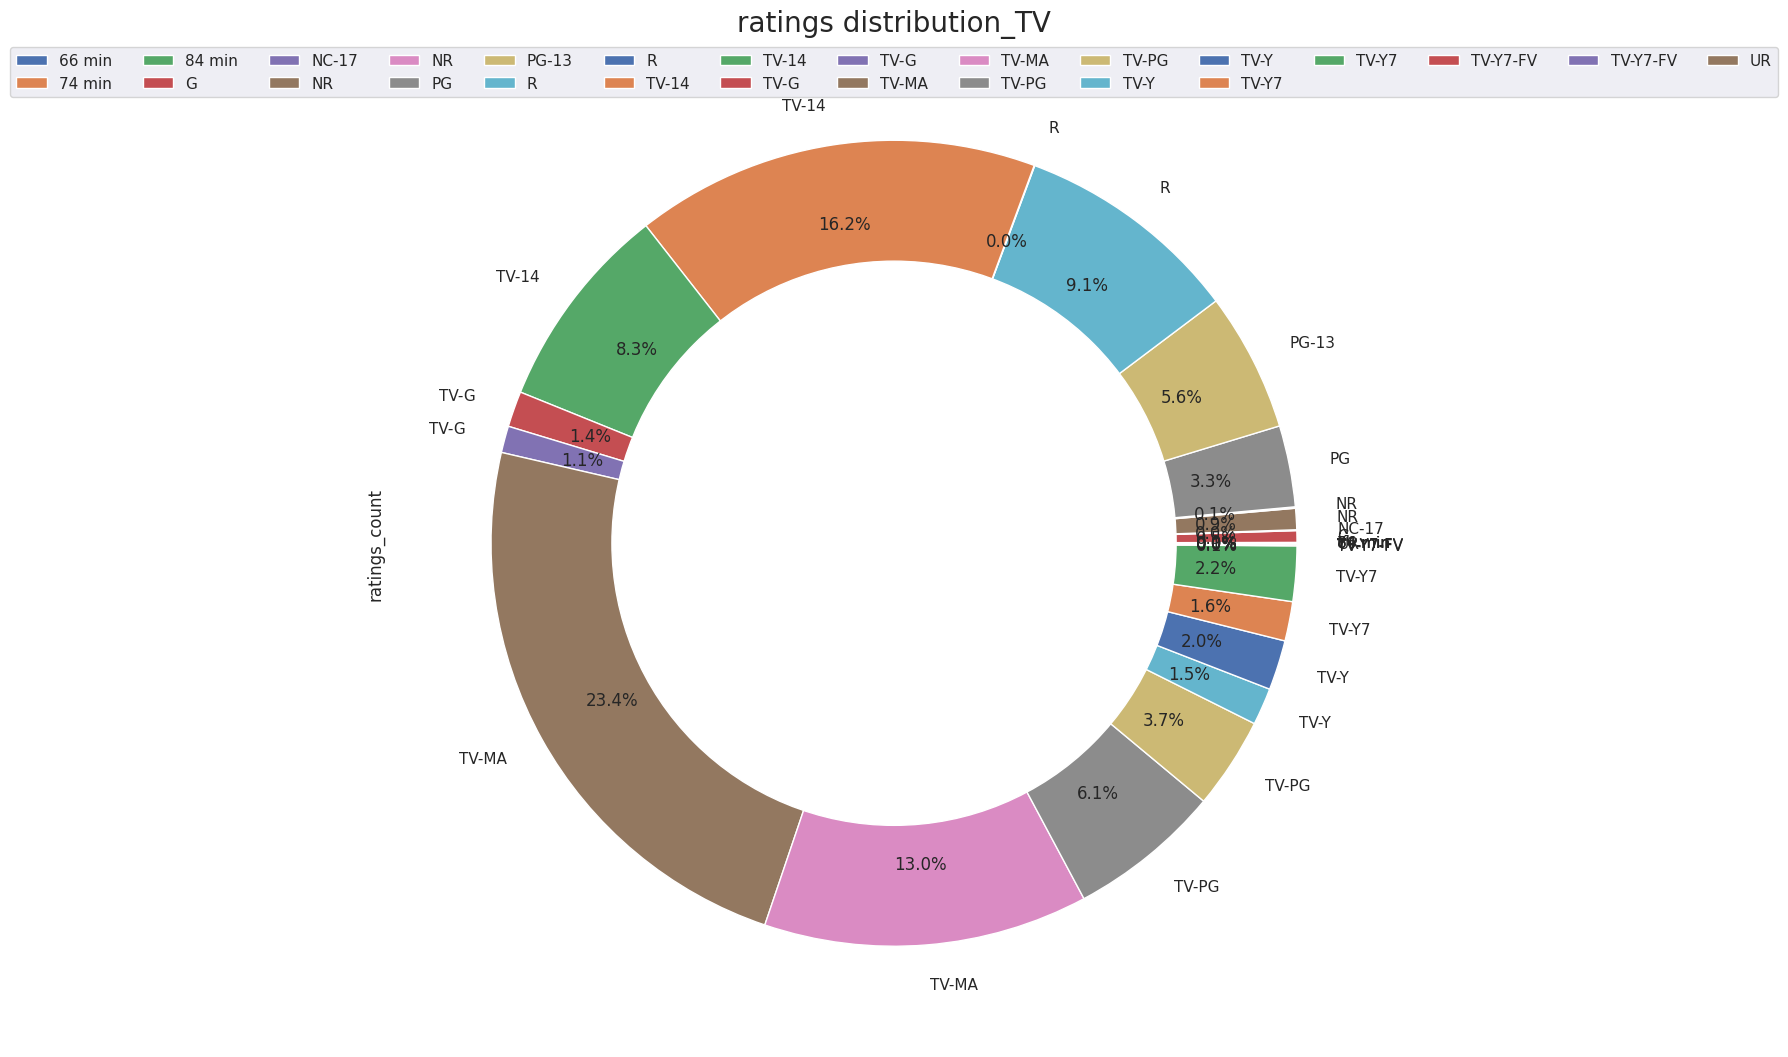

In [54]:
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,)
rating_TV.plot.pie(y='ratings_count',autopct='%.1f%%', figsize=(13,17), pctdistance= 0.80,  x='explode')
plt.title('ratings distribution_TV', fontsize=20)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(ncol=15, loc="upper center")

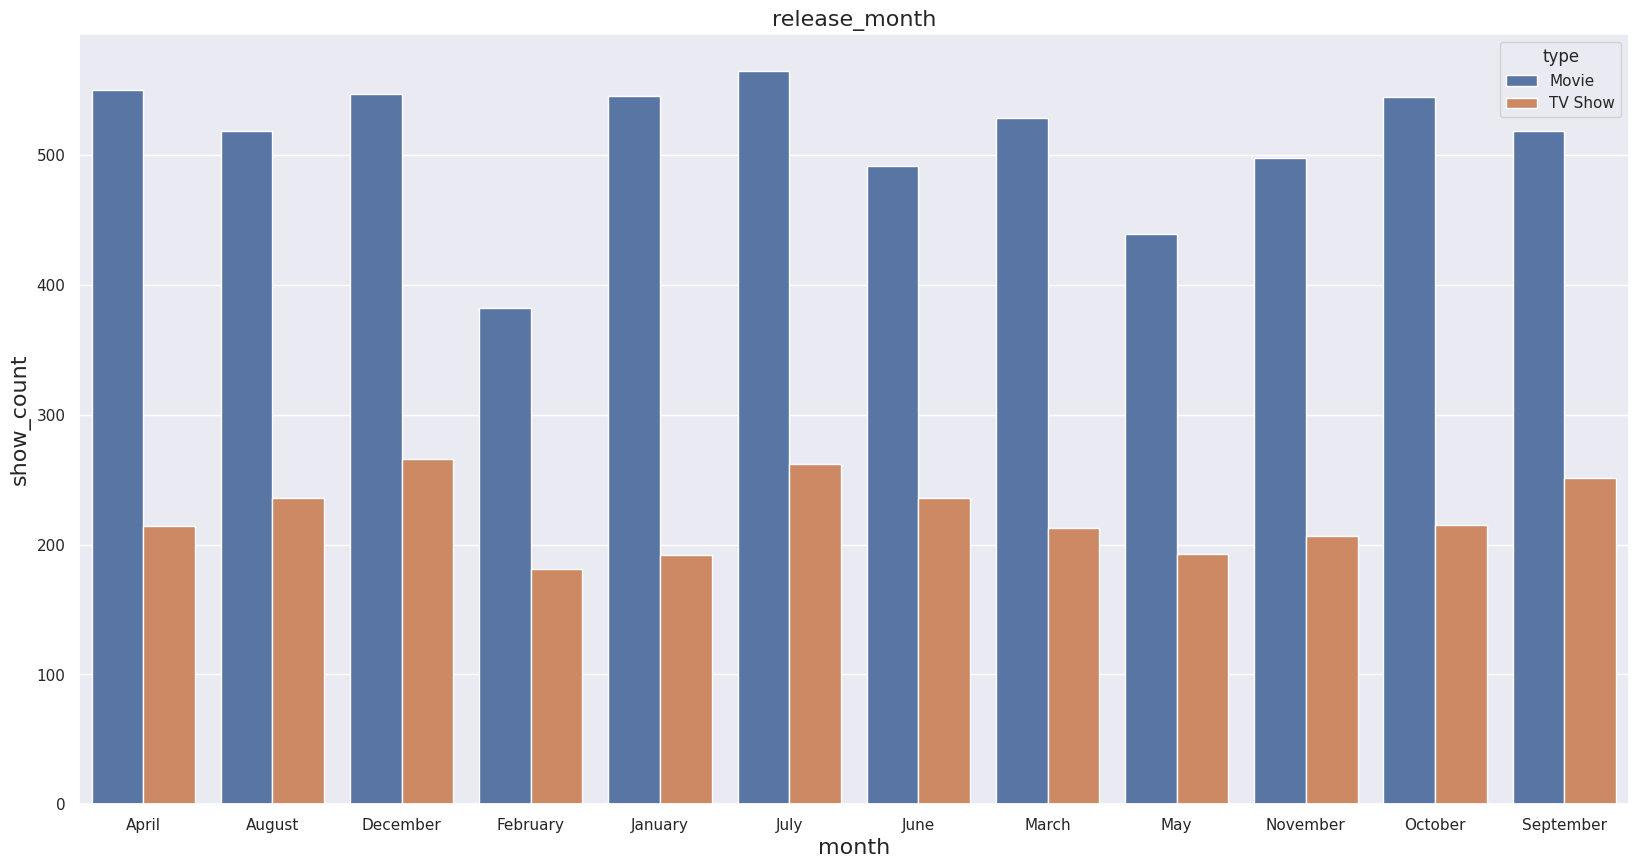

In [57]:
sns.barplot(x =release_month.reset_index()['month_added'], y= release_month.reset_index()['release_month'],
            hue =  release_month.reset_index()['type']);
plt.title('release_month' , fontsize=16)
plt.xlabel('month', fontsize=16);
plt.ylabel('show_count', fontsize=16);
sns.set(rc = {'figure.figsize':(12,6)})

[Text(0.5, 0, 'year'),
 Text(0, 0.5, 'release_count'),
 Text(0.5, 1.0, 'release_per_year')]

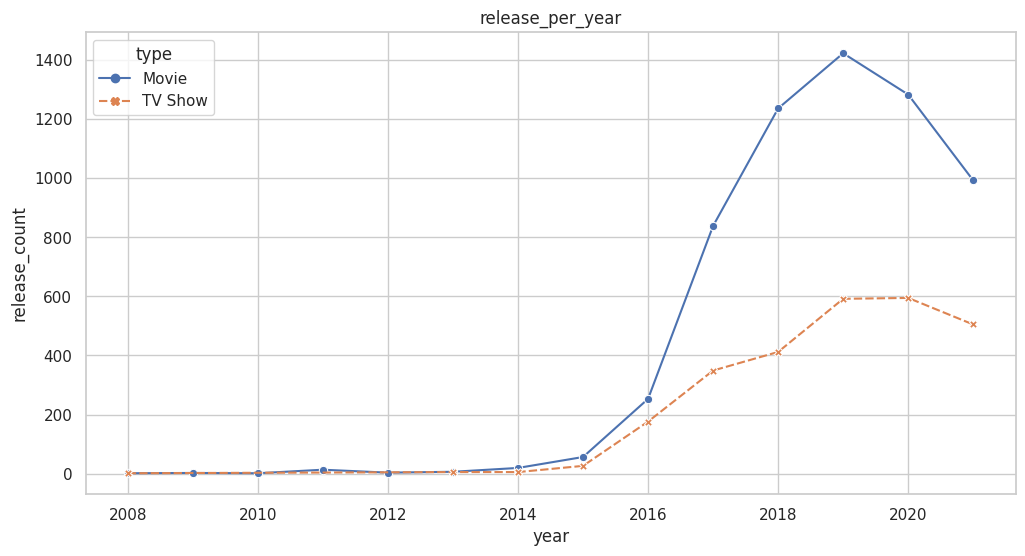

In [58]:
sns.set_style("whitegrid")
# plot boxplot
gfg = sns.lineplot(x ="year_added", y ="release_count", hue="type" ,style="type", markers=True, data = release_year)
 
# add label to the axis and label to the plot
gfg.set(xlabel ="year", ylabel = "release_count", title ='release_per_year')

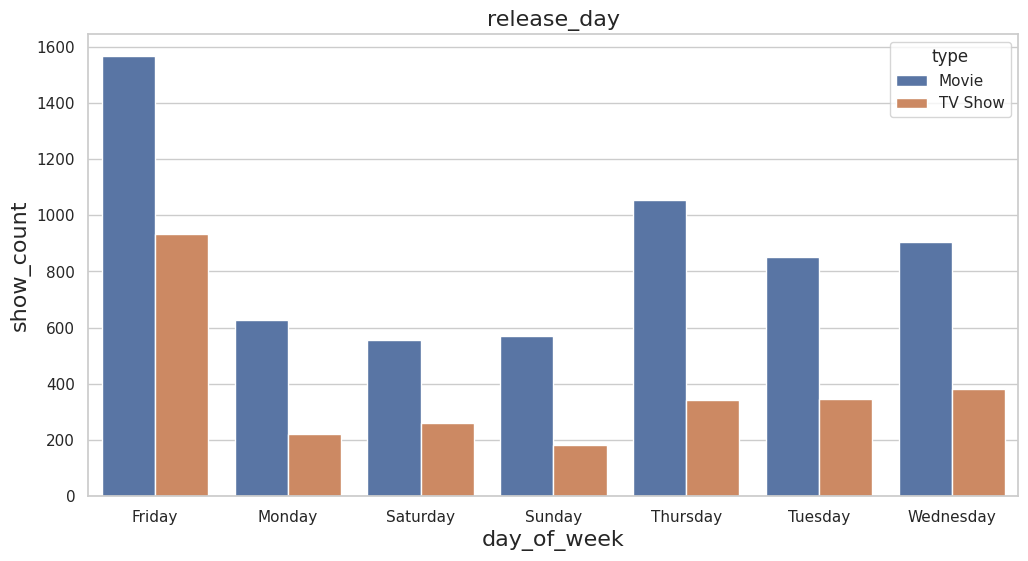

In [59]:
sns.barplot(x =release_Day.reset_index()['day_added'], y= release_Day.reset_index()['release_Day'],
            hue =  release_Day.reset_index()['type']);
plt.title('release_day' , fontsize=16)
plt.xlabel('day_of_week', fontsize=16);
plt.ylabel('show_count', fontsize=16);
sns.set(rc = {'figure.figsize':(12,6)})

In [ ]:
* A pie chart comparing Netflix movie uploads to TV show uploads from 2008 to 2021 reveals a 39.4% increase in movie uploads.

* Netflix has the most movies from the United States, followed by India in second place and the United Kingdom in third place. It also has the most TV episodes from the United States, followed by Pakistan in second place and the United Kingdom in third place.

* Netflix has the most titles in the "Dramas, International Movies" genre, followed byCrime TV Shows, International TV Shows, TV Dramas' in second place and Stand-Up Comedy in third, according to the overall top 20 genre barchart. and one of the key findings is that the majority of TV programmes are intended for kids tv.

* In the overall rating distribution donut chart, we can see that 36.5% of the shows have TV-MA ratings, indicating that the majority of the shows are for mature audiences, with TV-14 ratings coming in second. Parental Guidelines denotes content, and R rating at the third R classification denotes that the film is not suitable for minors to watch due to violence, offensive language, or sexual activity.

* The movie rating distribution donut chart reveals that 33.7% of movies are rated TV-MA. A TV-MA rating indicates that the show is meant for mature audiences. The second most shows are classified TV-14, which means that Parental Guidelines indicates content for mature audiences, and the third most shows are rated R, which implies that they are not acceptable for children to watch due to violence, foul language, or sexual activity.

* The TV rating distribution donut chart reveals that 42.9% of moviesTV show are rated TV-MA, which means that the broadcasts are meant for mature audiences. The second most shows are rated TV-14, which implies that Parental Guidelines indicates content for mature audiences, and the third most series are rated TV-PG, which denotes under parental guidance.

* The release month barchart indicates that Netflix routinely releases new shows throughout the year.

* In the release per year linechart, we can observe that Netflix began to add shows in large quantities from 2014.

* The majority of the shows on Netflix are released on Friday, as can be seen in the release day barchart.